## Import libraries

In [46]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [47]:
df = pd.read_csv("train.csv")

In [48]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## EDA and Data Preprocessing

In [49]:
df.shape

(1460, 81)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [51]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

## Dealing with missing value 

In [52]:
columns_with_nulls = df.columns[df.isnull().any()]
null_counts = df[columns_with_nulls].isnull().sum()

print("Columns with Null Values:")
for column, null_count in null_counts.items():
    print(f"{column}: {null_count}\t -> Type: {df[column].dtype}")


Columns with Null Values:
LotFrontage: 259	 -> Type: float64
Alley: 1369	 -> Type: object
MasVnrType: 872	 -> Type: object
MasVnrArea: 8	 -> Type: float64
BsmtQual: 37	 -> Type: object
BsmtCond: 37	 -> Type: object
BsmtExposure: 38	 -> Type: object
BsmtFinType1: 37	 -> Type: object
BsmtFinType2: 38	 -> Type: object
Electrical: 1	 -> Type: object
FireplaceQu: 690	 -> Type: object
GarageType: 81	 -> Type: object
GarageYrBlt: 81	 -> Type: float64
GarageFinish: 81	 -> Type: object
GarageQual: 81	 -> Type: object
GarageCond: 81	 -> Type: object
PoolQC: 1453	 -> Type: object
Fence: 1179	 -> Type: object
MiscFeature: 1406	 -> Type: object


* We will drop around 6 columns due to their high number of missing values. Additionally,
 we can replace the 'FireplaceQu' column with the 'Fireplaces' column.
* I will also remove the 'Id' column since all its values are unique and it will not aid in the prediction.

In [53]:
df.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature','MasVnrType','Id'], axis=1 , inplace=True)

In [54]:
mask = df['GarageArea'] == 0
garage_columns = df.loc[mask, df.columns[54:-13]].columns

In [55]:
garage_columns

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [56]:
df.loc[mask, df.columns[54:-13]]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
39          NaN          NaN          NaN           0           0        NaN   
48          NaN          NaN          NaN           0           0        NaN   
78          NaN          NaN          NaN           0           0        NaN   
88          NaN          NaN          NaN           0           0        NaN   
89          NaN          NaN          NaN           0           0        NaN   
...         ...          ...          ...         ...         ...        ...   
1349        NaN          NaN          NaN           0           0        NaN   
1407        NaN          NaN          NaN           0           0        NaN   
1449        NaN          NaN          NaN           0           0        NaN   
1450        NaN          NaN          NaN           0           0        NaN   
1453        NaN          NaN          NaN           0           0        NaN   

     GarageCond  
39          NaN  
48          NaN  
78          NaN  
88          NaN  
89          NaN  
...         ...  
1349        NaN  
1407        NaN  
1449        NaN  
1450        NaN  
1453        NaN  

[81 rows x 7 columns]

In [57]:
for i in garage_columns:
    if df[i].dtype == 'object':
        df[i] = df[i].fillna("0")
    else:
        df[i] = df[i].fillna(0)

* Here we fill all the missing values with Zeros as (if the GarageArea == 0) This mean tha the house doesn't have any Garage.

* Bellow we will deal with the basement missing values

In [58]:
subset_df = df.iloc[:,27:36]

nan_rows = subset_df[subset_df.isnull().any(axis=1)]
nan_rows.head()

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
17       NaN      NaN          NaN          NaN           0          NaN   
39       NaN      NaN          NaN          NaN           0          NaN   
90       NaN      NaN          NaN          NaN           0          NaN   
102      NaN      NaN          NaN          NaN           0          NaN   
156      NaN      NaN          NaN          NaN           0          NaN   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
17            0          0            0  
39            0          0            0  
90            0          0            0  
102           0          0            0  
156           0          0            0

In [59]:
df['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [60]:
basement_columns = df.iloc[:,27:36]

for i in basement_columns:
    if df[i].dtype == 'object':
        df[i] = df[i].fillna("None")
    else:
        df[i] = df[i].fillna(df[i].median())

* I fill it with none as every basement columns are missing.

In [61]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

In [62]:
columns_with_nulls = df.columns[df.isnull().any()]
null_counts = df[columns_with_nulls].isnull().sum()

print("Columns with Null Values:")
for column, null_count in null_counts.items():
    print(f"{column}: {null_count}\t -> Type: {df[column].dtype}")

Columns with Null Values:


* Now we don't have any Nulls.

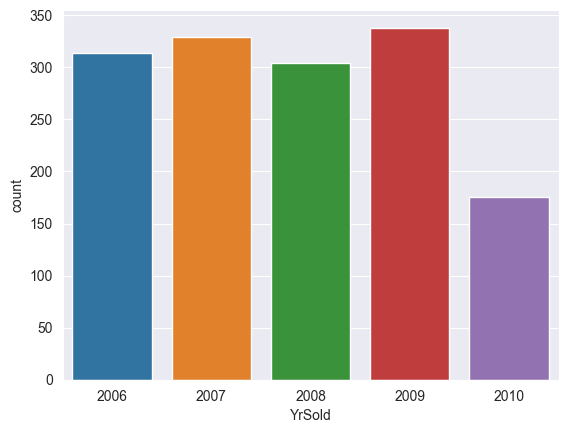

In [63]:
sns.countplot(data=df,x=df['YrSold'])
plt.show()

* The largest number of houses were sold in 2009.

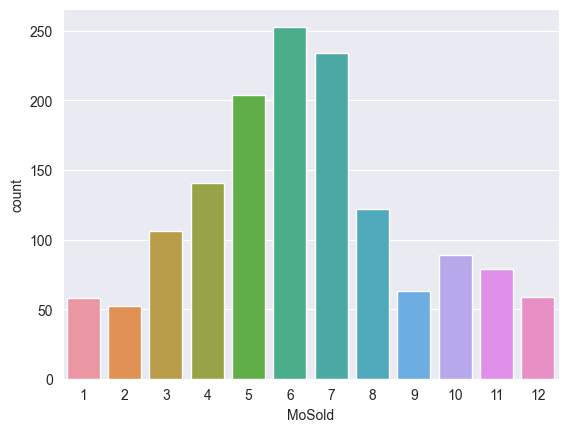

In [64]:
sns.countplot(data=df,x=df['MoSold'])
plt.show()

* From this graph, we notice that the majority of houses are sold in June and July.

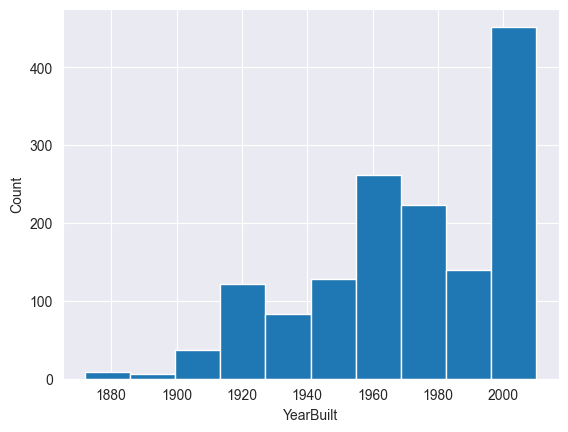

In [65]:
df['YearBuilt'].hist()
plt.xlabel('YearBuilt')
plt.ylabel('Count')
plt.show()

* The highest number of houses were built in the 2000s.

In [66]:
current_year = datetime.datetime.now().year
df['House Age'] = current_year - df['YearBuilt']

In [67]:
df.drop('YearBuilt',axis=1,inplace=True)

In [68]:
# List the names of columns with data type 'object'
object_column_names = df.select_dtypes(include=['object']).columns

object_column_names

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

MSZoning



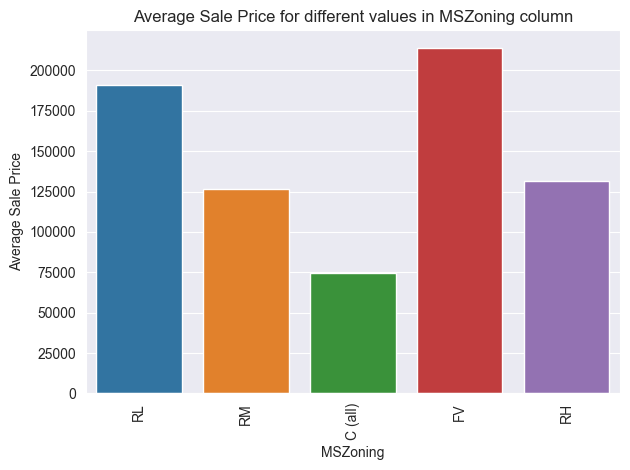

Street



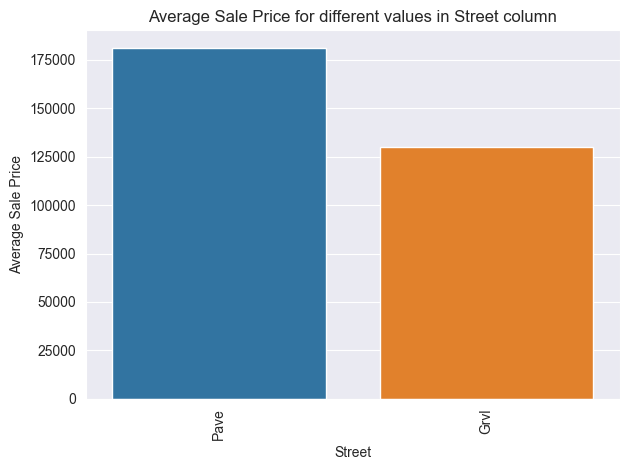

LotShape



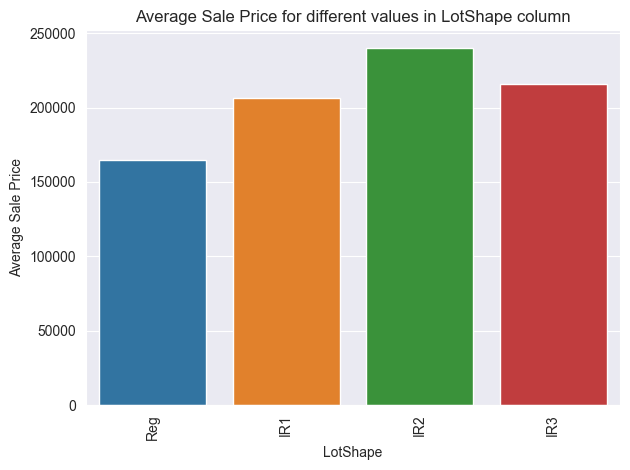

LandContour



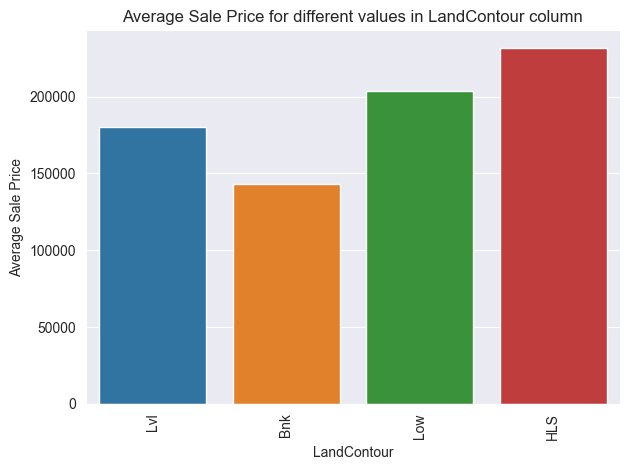

Utilities



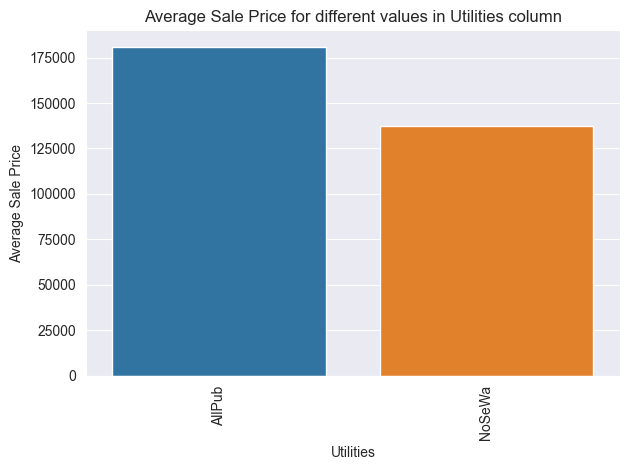

LotConfig



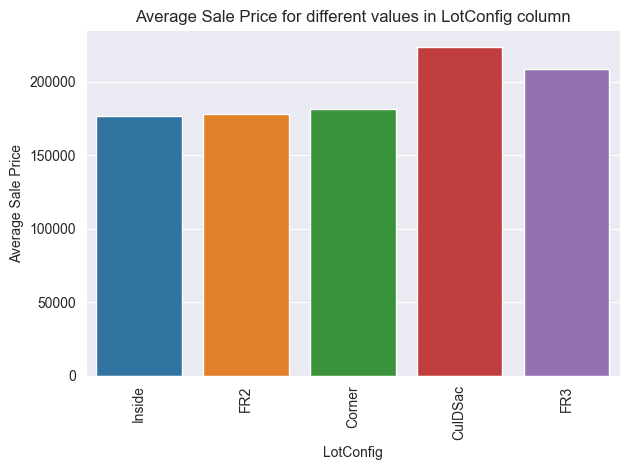

LandSlope



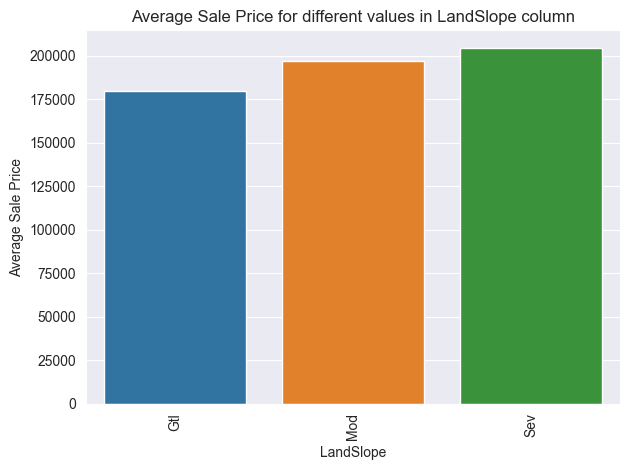

Neighborhood



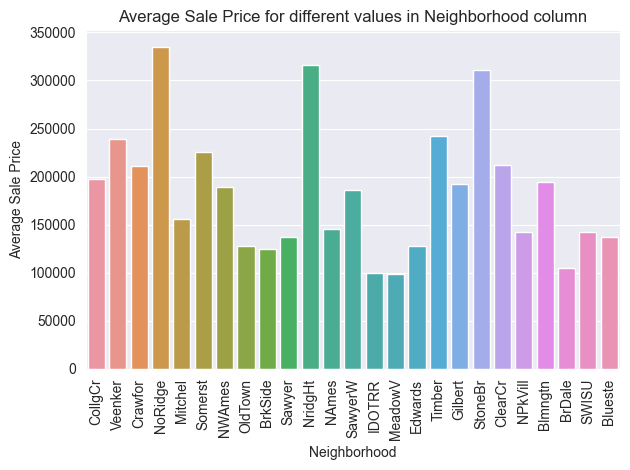

Condition1



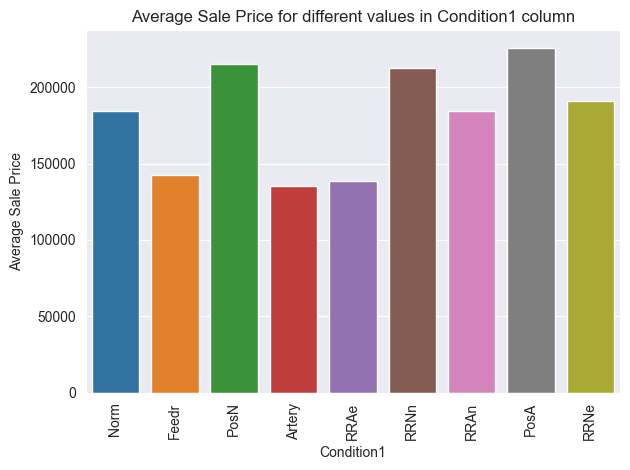

Condition2



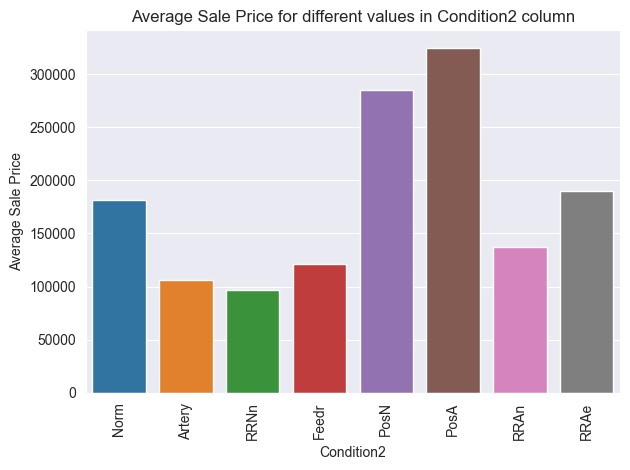

BldgType



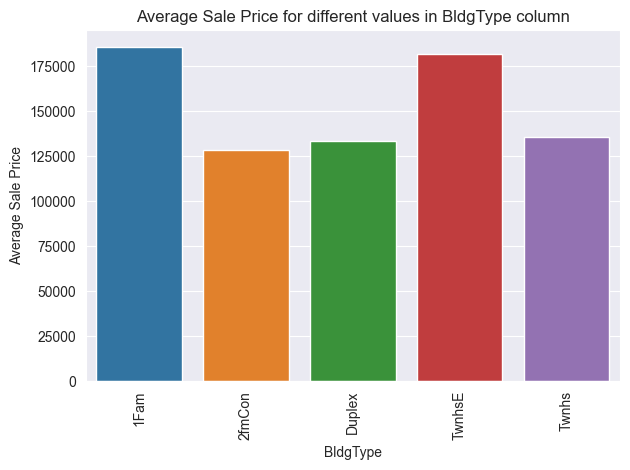

HouseStyle



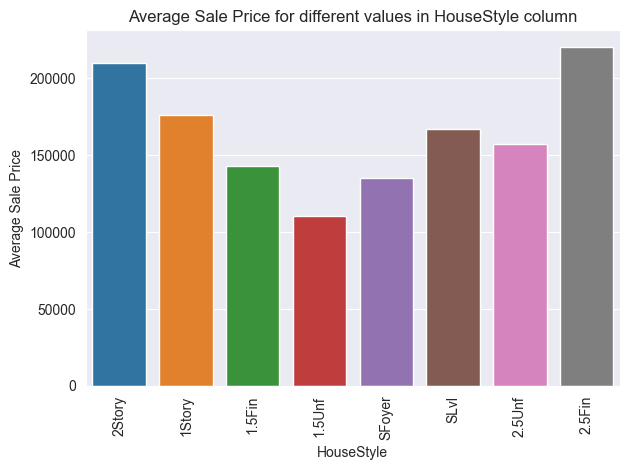

RoofStyle



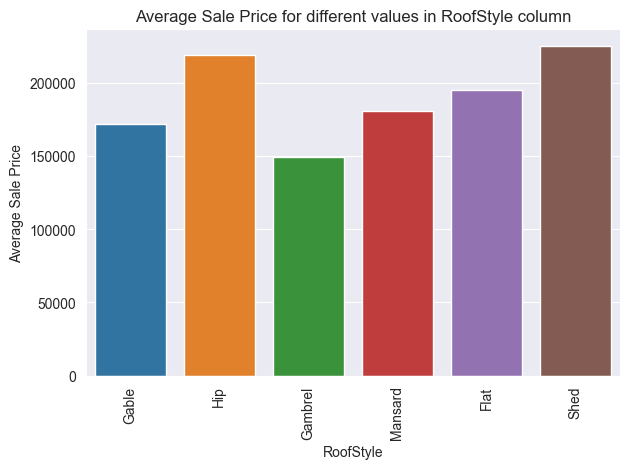

RoofMatl



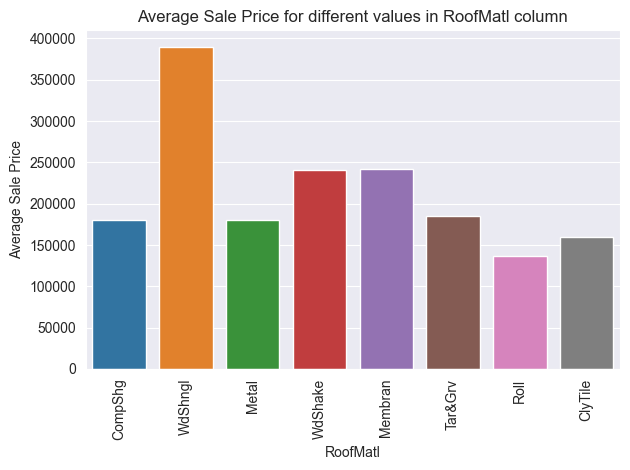

Exterior1st



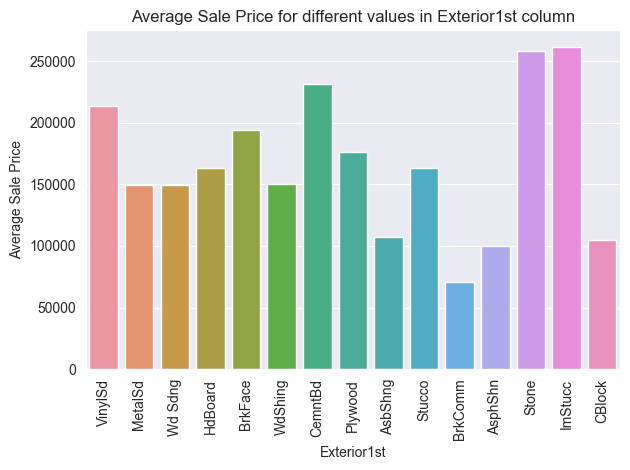

Exterior2nd



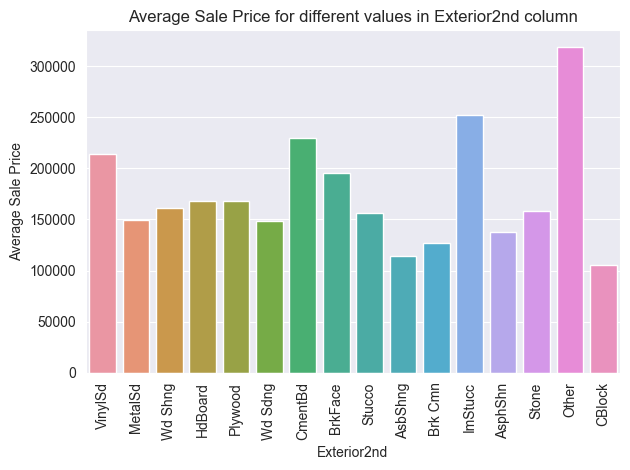

ExterQual



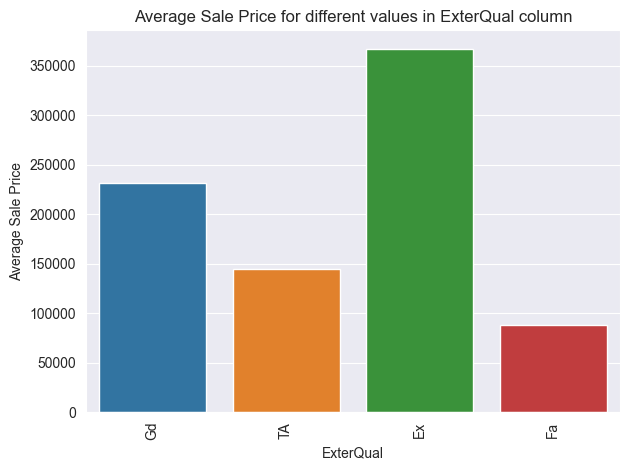

ExterCond



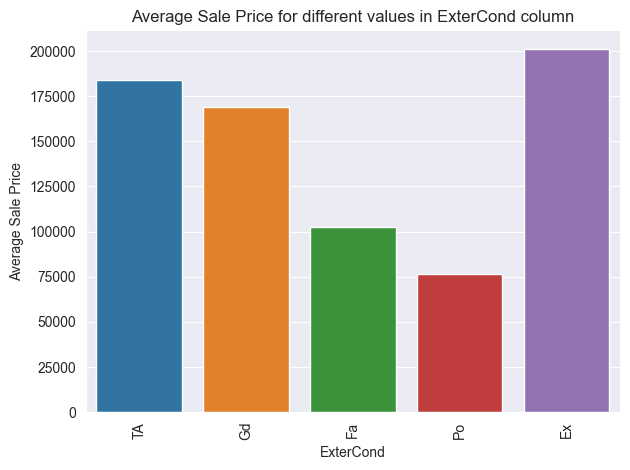

Foundation



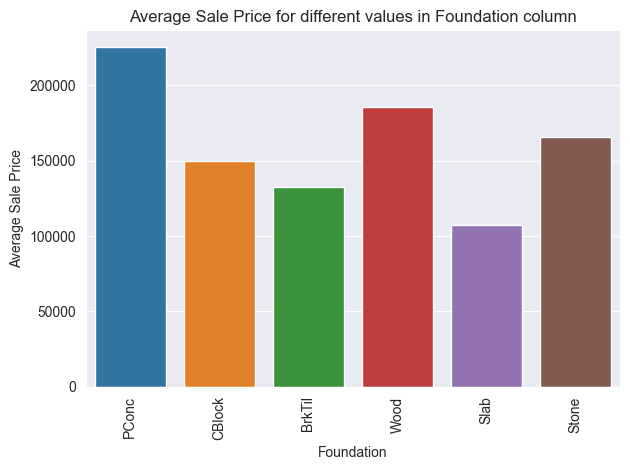

BsmtQual



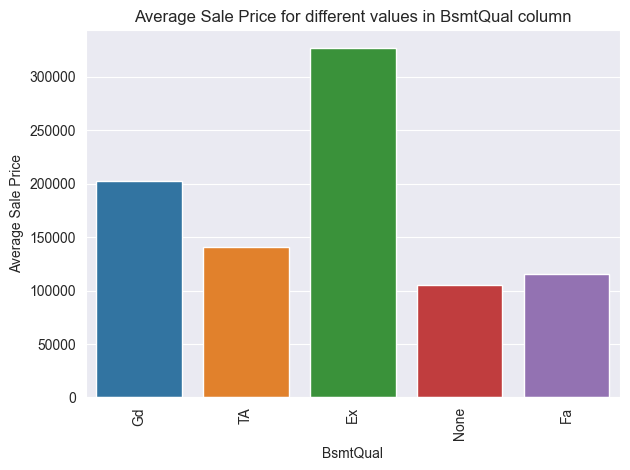

BsmtCond



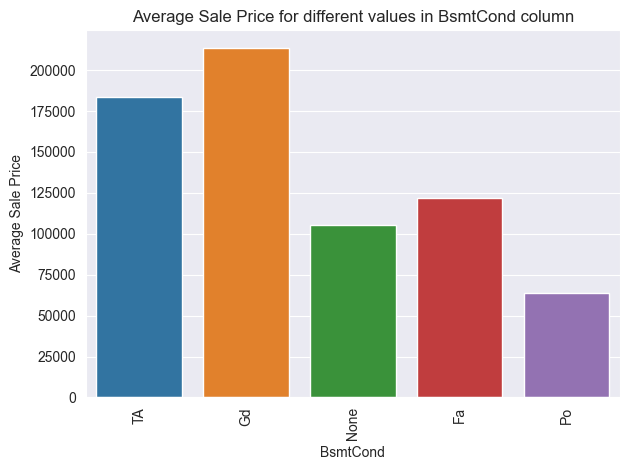

BsmtExposure



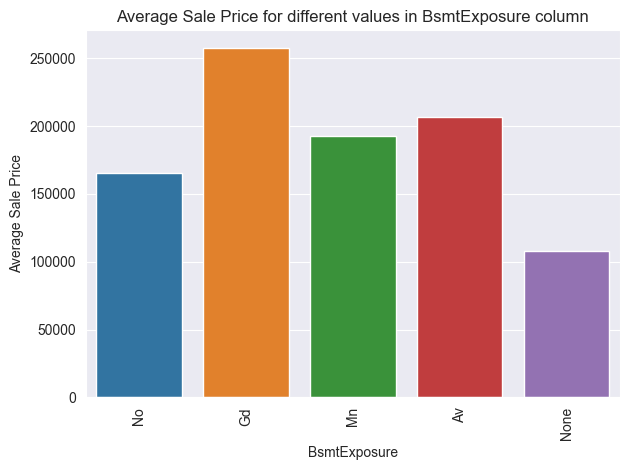

BsmtFinType1



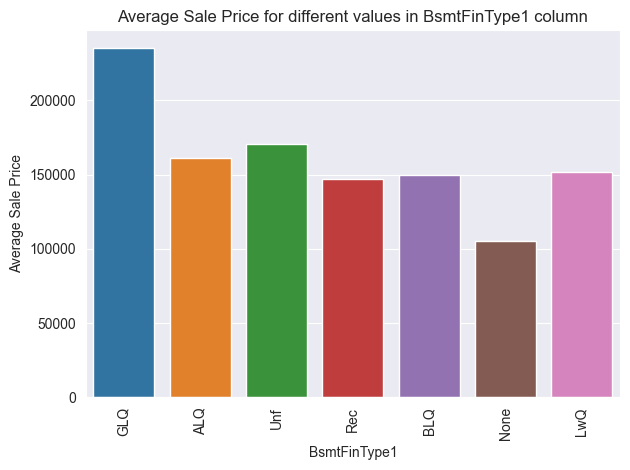

BsmtFinType2



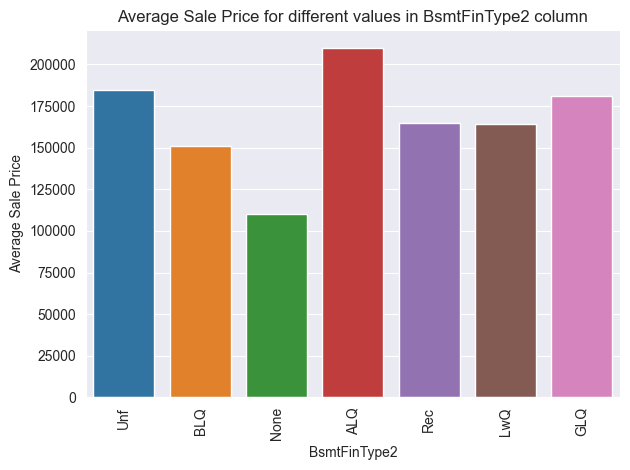

Heating



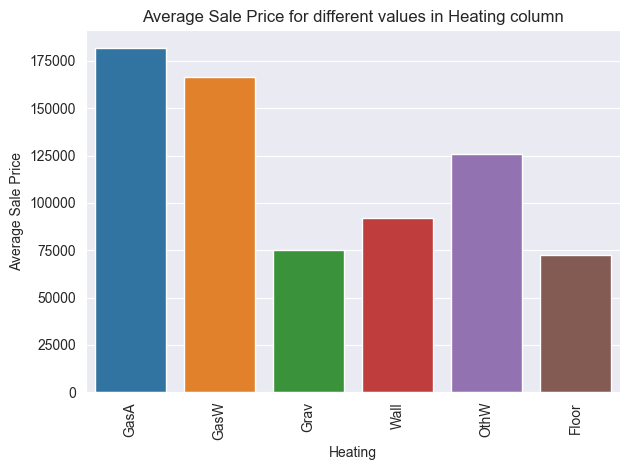

HeatingQC



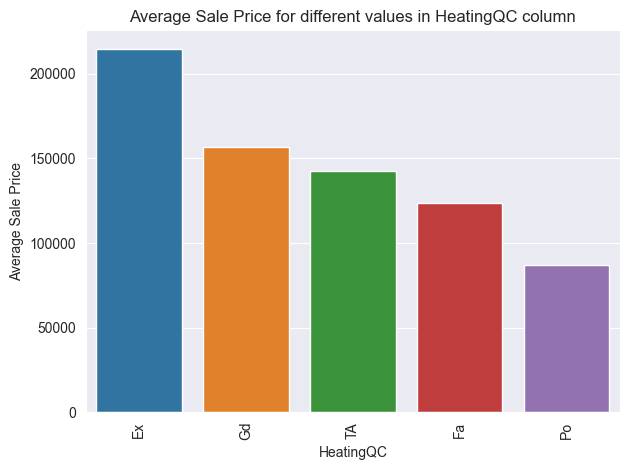

CentralAir



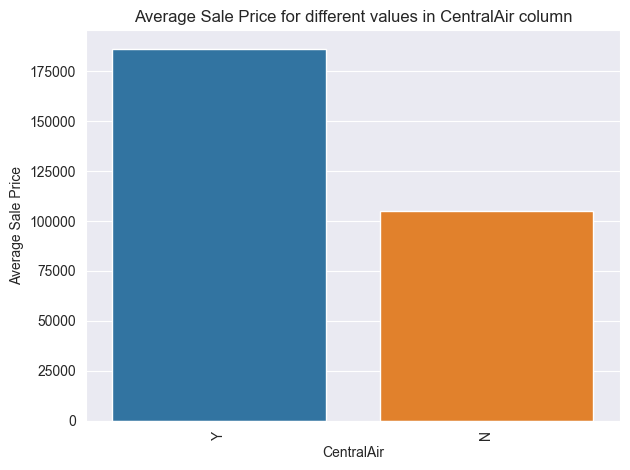

Electrical



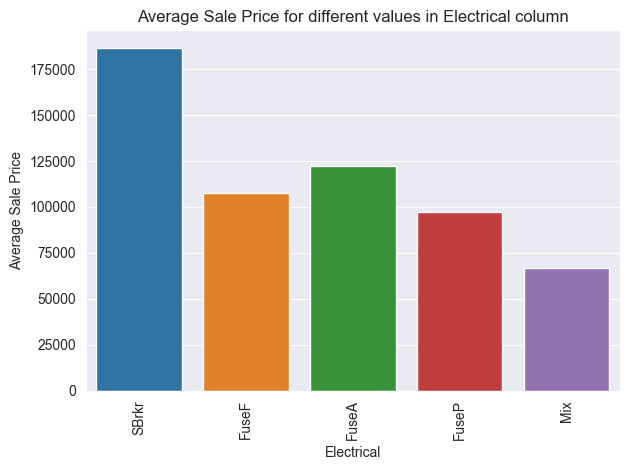

KitchenQual



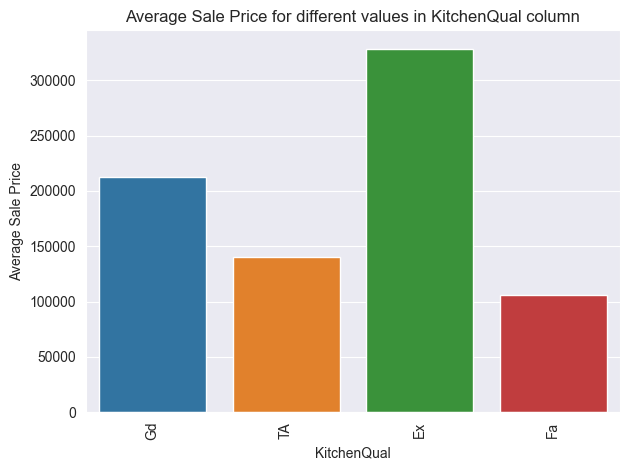

Functional



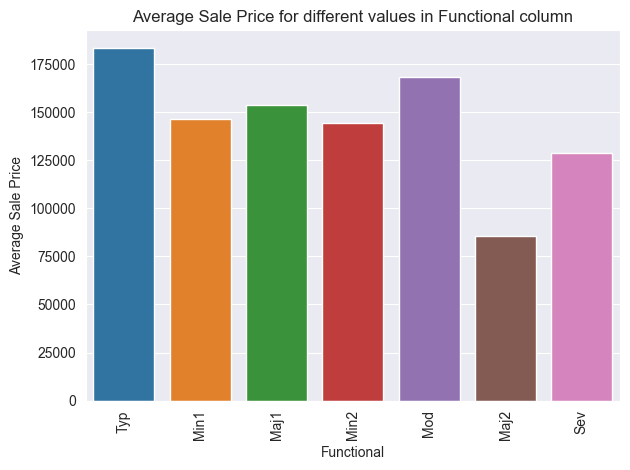

GarageType



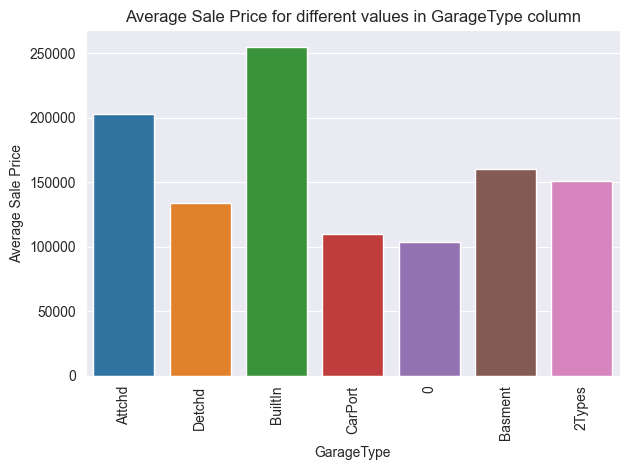

GarageFinish



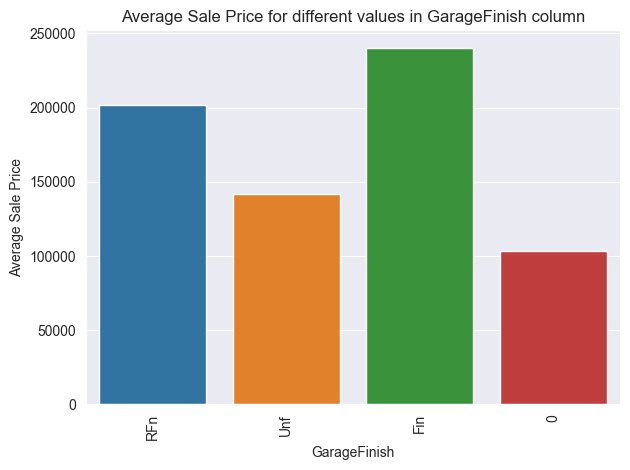

GarageQual



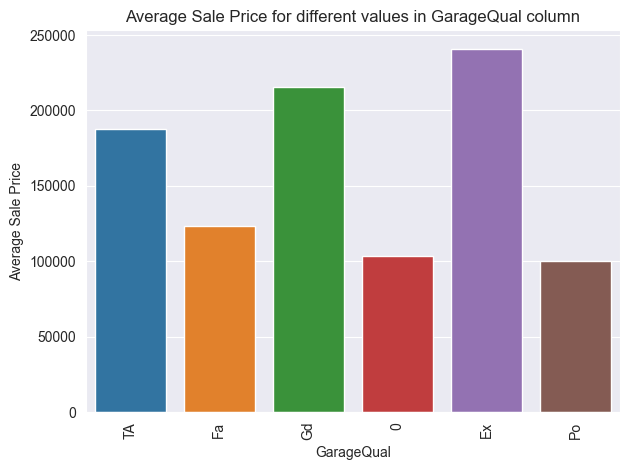

GarageCond



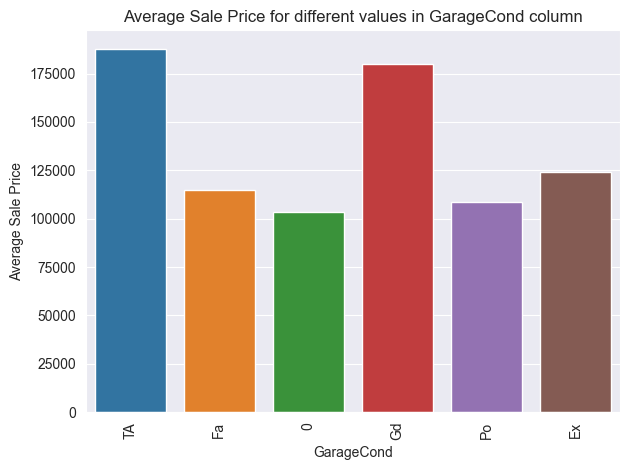

PavedDrive



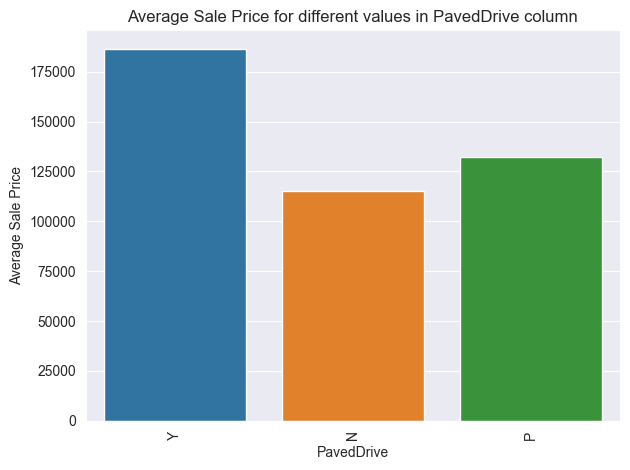

SaleType



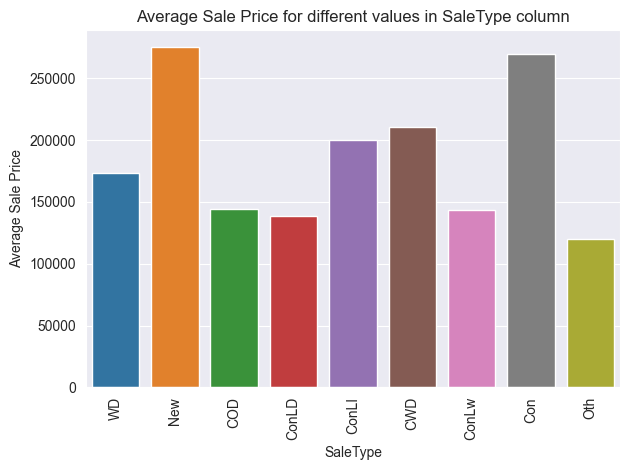

SaleCondition



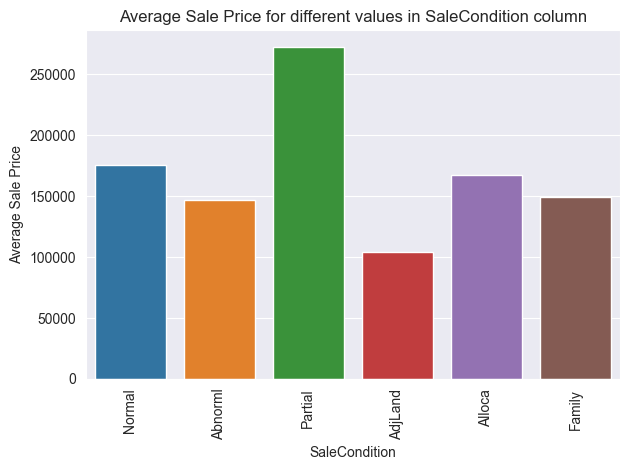

In [69]:
for col in object_column_names:
    print(f"{col}\n")
    labels = df[col].unique()
    prices = []
    for label in labels:
        price = df.loc[df[col] == label,'SalePrice'].mean()
        prices.append(price)
    sns.barplot(x = labels,y = prices)
    plt.title(f"Average Sale Price for different values in {col} column")
    plt.xlabel(col)
    plt.ylabel('Average Sale Price')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

## Data Encoding

In [70]:
for col in object_column_names:
    if df[col].nunique() < 4:
        encoder = OneHotEncoder()
        encoded_values = encoder.fit_transform(df[[col]]).toarray()
        encoded_columns = pd.DataFrame(encoded_values, columns=[f'{col}_{i}' for i in range(encoded_values.shape[1])])
        df = pd.concat([df, encoded_columns], axis=1)
        df.drop(col, axis=1, inplace=True)
    else:
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int32  
 5   LandContour    1460 non-null   int32  
 6   LotConfig      1460 non-null   int32  
 7   Neighborhood   1460 non-null   int32  
 8   Condition1     1460 non-null   int32  
 9   Condition2     1460 non-null   int32  
 10  BldgType       1460 non-null   int32  
 11  HouseStyle     1460 non-null   int32  
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   int32  
 16  RoofMatl       1460 non-null   int32  
 17  Exterior1st    1460 non-null   int32  
 18  Exterior

## Removing outliers

In [72]:
def remove_outliers_zScore(df, columns, threshold):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    outliers = df[(z_scores > threshold).any(axis=1)]
    cleaned_df = df[(z_scores <= threshold).all(axis=1)]
    
    return cleaned_df, outliers

In [73]:
df, outliers = remove_outliers_zScore(df, df.columns, threshold=5)

In [74]:
outliers.shape

(178, 81)

## Split the data into features and target variable

In [75]:
X_train = df.drop('SalePrice', axis=1)
Y_train = df['SalePrice']

In [76]:
X_train.shape

(1282, 80)

In [77]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

## Modeling

In [78]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [79]:
# Evaluate the model using the validation set
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)

mse_for_training = mean_squared_error(y_train,y_train_pred)
mse = mean_squared_error(y_val, y_val_pred)

r2 = r2_score(y_val, y_val_pred)

print(f'Mean Squared Error (Training Data): {mse_for_training}')
print(f'Mean Squared Error (Testing Data): {mse}')
print(f'R-squared: {r2}')

Mean Squared Error (Training Data): 486744941.5630737
Mean Squared Error (Testing Data): 469854894.9735482
R-squared: 0.9117178403173306


## Linear regression Visualization

In [80]:
def visualize_regression_line(model, x_val, y_val):
    features = x_val.columns

    # Set the number of rows and columns for subplots
    num_rows = (len(features) - 1) // 3 + 1
    num_cols = min(len(features), 3)

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows), squeeze=False)

    # Flatten the axs array to simplify indexing
    axs = axs.flatten()

    # Iterate over each feature and plot the regression line
    for i, feature in enumerate(features):
        x_feature = x_val[feature]

        # Scatter plot the actual target variable against the selected feature
        axs[i].scatter(x_feature, y_val, color='blue', label='Actual')

        # Predict the target variable using the trained model
        y_val_pred = model.predict(x_val)

        # Sort the feature values and predicted values by the feature values
        sorted_indices = x_feature.argsort()
        x_feature_sorted = x_feature.iloc[sorted_indices]
        y_val_pred_sorted = y_val_pred[sorted_indices]

        # Plot the predicted values
        axs[i].plot(x_feature_sorted, y_val_pred_sorted, color='red', linewidth=2, label='Predicted')

        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('SalePrice')
        axs[i].set_title(f'Linear Regression: Actual vs. Predicted ({feature})')

        axs[i].legend()

    plt.tight_layout()

    plt.show()

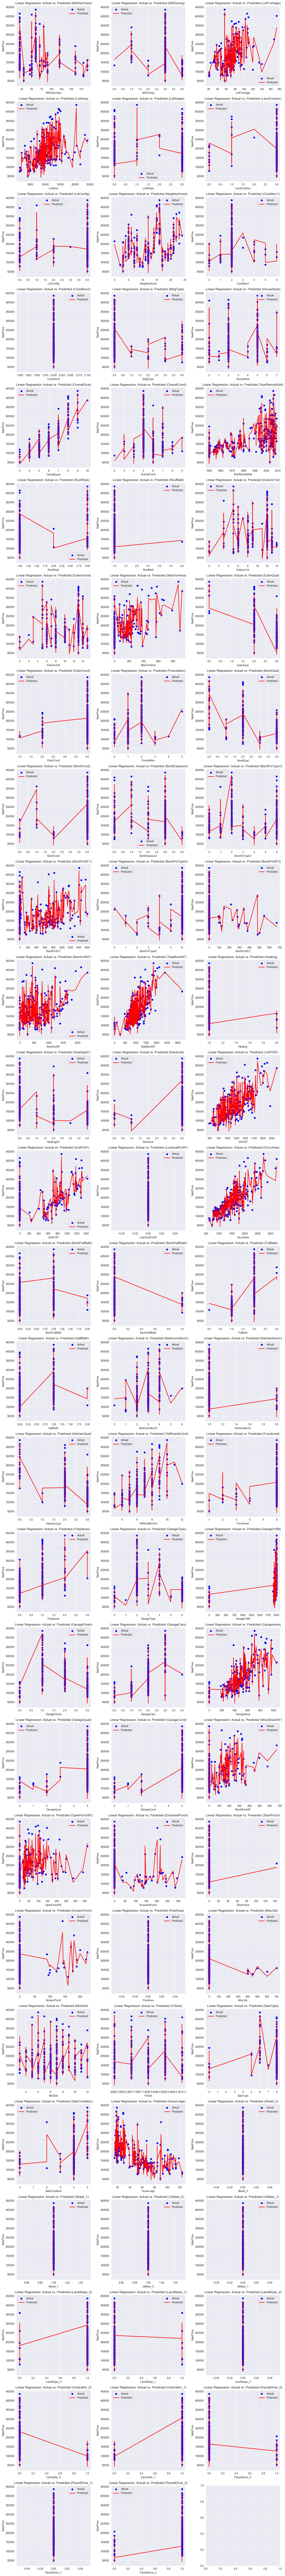

In [81]:
visualize_regression_line(model, x_val, y_val)

## Random Forest Regression Model

In [82]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [83]:
# Evaluate the model using the validation set
y_train_pred = rf_model.predict(x_train)
y_val_pred = rf_model.predict(x_val)

mse_for_training = mean_squared_error(y_train,y_train_pred)
mse = mean_squared_error(y_val, y_val_pred)

r2 = r2_score(y_val, y_val_pred)

print(f'Mean Squared Error (Training Data): {mse_for_training}')
print(f'Mean Squared Error (Testing Data): {mse}')
print(f'R-squared: {r2}')

Mean Squared Error (Training Data): 78760824.90917902
Mean Squared Error (Testing Data): 469980441.72891515
R-squared: 0.9116942510372709


## Gradient Boosting Regression

In [84]:
gb_model = GradientBoostingRegressor( max_depth=3, min_samples_leaf=4,n_estimators=100)
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(min_samples_leaf=4)

In [85]:
y_train_pred = gb_model.predict(x_train)
y_val_pred = gb_model.predict(x_val)

mse_for_training = mean_squared_error(y_train,y_train_pred)
mse = mean_squared_error(y_val, y_val_pred)

r2 = r2_score(y_val, y_val_pred)

print(f'Mean Squared Error (Training Data): {mse_for_training}')
print(f'Mean Squared Error (Testing Data): {mse}')
print(f'R-squared: {r2}')

Mean Squared Error (Training Data): 151130196.64662012
Mean Squared Error (Testing Data): 403577856.6007306
R-squared: 0.9241707915316686
